In [ ]:
# Mount google drive :

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the dataset and save it to the path "/content/imagedb_btsd" :
import os
import zipfile

local_zip = '/content/drive/MyDrive/cv_proj_4_dataset/imagedb_btsd.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/imagedb_btsd')
zip_ref.close()

In [ ]:
# Select the folder "imagedb" as the training folder
# and the folder "imagedb_test" as the testing folder :

base_dir = '/content/imagedb_btsd'

train_dir = os.path.join(base_dir, 'imagedb')
test_dir = os.path.join(base_dir, 'imagedb_test')

In [ ]:
import os
import random
import skimage.io
from skimage import data, io, filters
# import skimage.data
# import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Allow image embeding in notebook
%matplotlib inline

In [ ]:
# Using a function to return two lists (images and labels) from the train_dir :
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

In [ ]:
# Display the first image of each label for all labels :

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()


# - - - - - - - - - - - - - - - - - - - - - Training Dataset : - - - - - - - - - - - - - - - - - - - - - 

In [ ]:
# Checking all the images of a specific label :

def display_label_images_train(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    # for image in images[start:end][:limit]:
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 cols
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

In [ ]:
# Extract images and labels fom training dataset :

images, labels = load_data(train_dir)

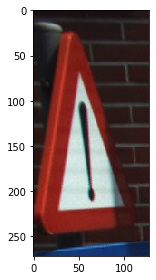

13


In [ ]:
# check images and labels :
io.imshow(images[20])
io.show()
print(labels[20])

In [ ]:
print("Training set :")
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Training set :
Unique Labels: 34
Total Images: 3056


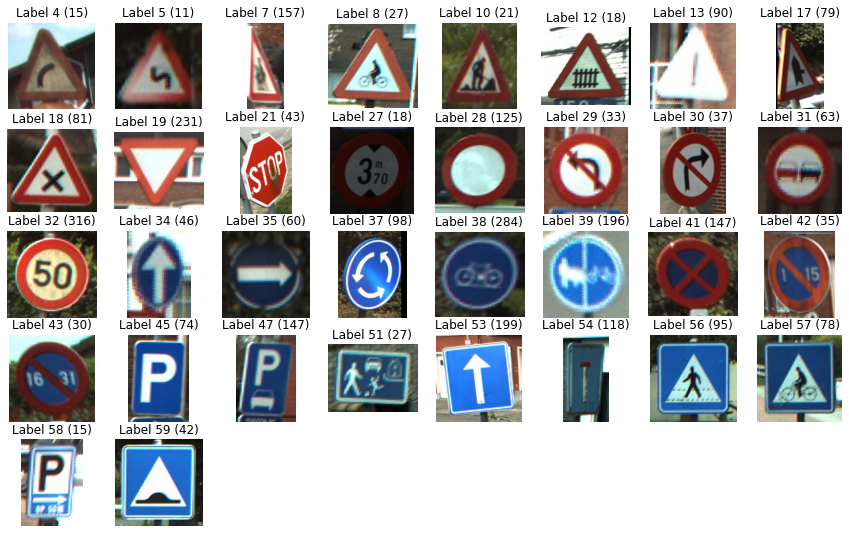

In [ ]:
display_images_and_labels(images, labels)

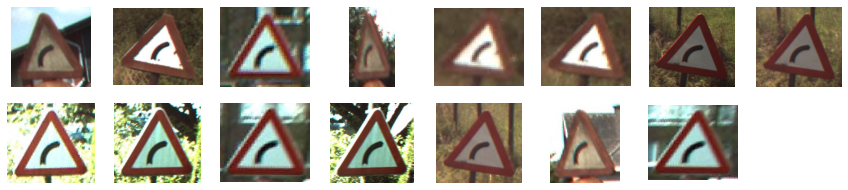

In [ ]:
# Plot all the images in training set for a specific label :

# e.g. for label :
# label_target = 32
# label_target = 27
label_target = 4

display_label_images_train(images, label_target)

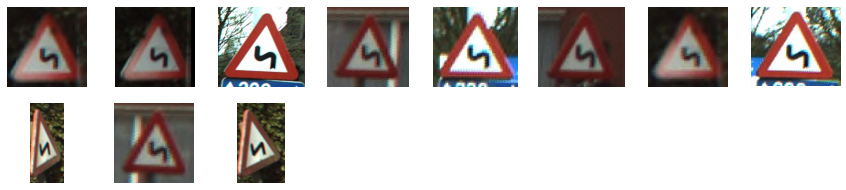

In [ ]:
label_target = 5

display_label_images_train(images, label_target)

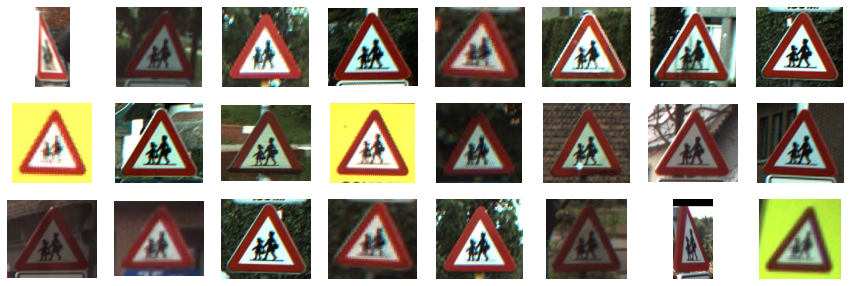

In [ ]:
label_target = 7

display_label_images_train(images, label_target)

# - - - - - - - - - - - - - - - - - - - - - Testing Dataset : - - - - - - - - - - - - - - - - - - - - - 

In [ ]:
# Checking all the images of a specific label :

def display_label_images_test(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels_test.index(label)
    end = start + labels_test.count(label)
    # for image in images[start:end][:limit]:
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 cols
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

In [ ]:
# Extract images and labels fom testing dataset :

images_test, labels_test = load_data(test_dir)

In [ ]:
print("Testing set :")
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels_test)), len(images_test)))

Testing set :
Unique Labels: 34
Total Images: 2149


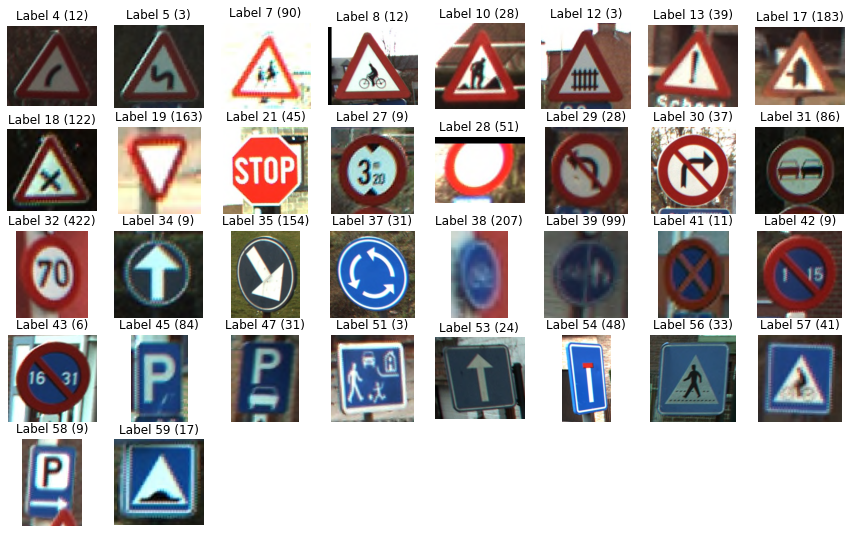

In [ ]:
display_images_and_labels(images_test, labels_test)

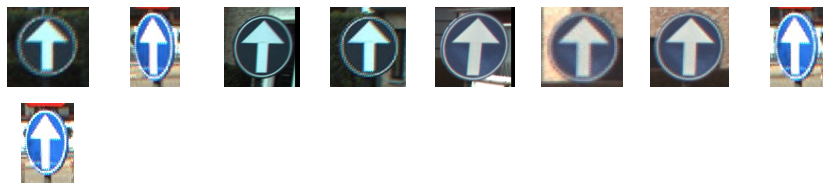

In [ ]:
label_target = 34

display_label_images_test(images_test, label_target)

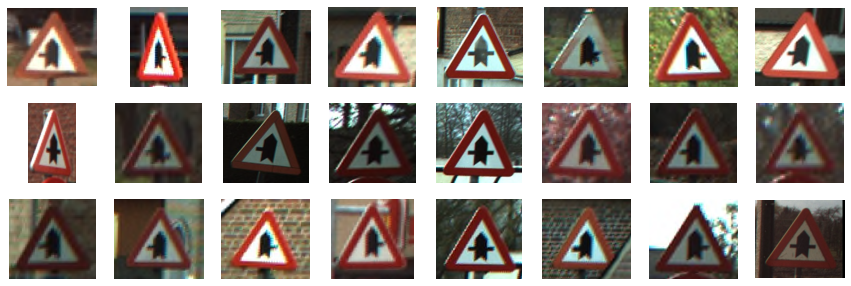

In [ ]:
label_target = 17

display_label_images_test(images_test, label_target)